In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import Data Penjualan
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/data

df = pd.read_excel('datafix.xlsx')

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/data


In [ ]:
df.head()

,tanggal,kodeTransaksi,idPelanggan,namaPelanggan,namaBarang,jumlah,total
0,2023-02-03,A0059,P023,Fatma Ramdhani,Gamis nibras ukuran xs,1,238000
1,2023-02-03,A0059,P023,Fatma Ramdhani,Joger M putih aurany,1,50000
2,2023-02-03,A0059,P023,Fatma Ramdhani,joger L hutam,1,55000
3,2023-02-03,A0059,P023,Fatma Ramdhani,loss xl,1,60000
4,2023-02-05,A0060,P023,Fatma Ramdhani,Gamis L nibras promo,1,228000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tanggal        564 non-null    datetime64[ns]
 1   kodeTransaksi  564 non-null    object        
 2   idPelanggan    564 non-null    object        
 3   namaPelanggan  564 non-null    object        
 4   namaBarang     564 non-null    object        
 5   jumlah         564 non-null    int64         
 6   total          564 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 31.0+ KB


In [ ]:
df.shape

(564, 7)

In [ ]:
df

,tanggal,kodeTransaksi,idPelanggan,namaPelanggan,namaBarang,jumlah,total
0,2023-02-03,A0059,P023,Fatma Ramdhani,Gamis nibras ukuran xs,1,238000
1,2023-02-03,A0059,P023,Fatma Ramdhani,Joger M putih aurany,1,50000
2,2023-02-03,A0059,P023,Fatma Ramdhani,joger L hutam,1,55000
3,2023-02-03,A0059,P023,Fatma Ramdhani,loss xl,1,60000
4,2023-02-05,A0060,P023,Fatma Ramdhani,Gamis L nibras promo,1,228000
...,...,...,...,...,...,...,...
559,2023-11-24,A0469,P093,mbak lala,damee dress nadheera,1,269900
560,2023-11-28,A0470,P130,mbak shoffie,tas alina black by gayaku,1,97000
561,2023-11-28,A0470,P131,mbak shofie,mukena nadheera,1,339900
562,2023-11-29,A0471,P093,mbak lala,mbak lala,5,1389500


# **DATA PREPROCESSING**

In [ ]:
df.isna().sum()

tanggal          0
kodeTransaksi    0
idPelanggan      0
namaPelanggan    0
namaBarang       0
jumlah           0
total            0
dtype: int64

In [ ]:
df.shape

(564, 7)

In [ ]:
# Mengubah nama customer menjadi huruf kecil
kolom_tujuan = 'namaPelanggan'
df[kolom_tujuan] = df[kolom_tujuan].str.lower()

In [ ]:
df.head()

,tanggal,kodeTransaksi,idPelanggan,namaPelanggan,namaBarang,jumlah,total
0,2023-02-03,A0059,P023,fatma ramdhani,Gamis nibras ukuran xs,1,238000
1,2023-02-03,A0059,P023,fatma ramdhani,Joger M putih aurany,1,50000
2,2023-02-03,A0059,P023,fatma ramdhani,joger L hutam,1,55000
3,2023-02-03,A0059,P023,fatma ramdhani,loss xl,1,60000
4,2023-02-05,A0060,P023,fatma ramdhani,Gamis L nibras promo,1,228000


In [ ]:
#Menghitung persentase nilai yang kosong
df.isnull().mean()*100.0

tanggal          0.0
kodeTransaksi    0.0
idPelanggan      0.0
namaPelanggan    0.0
namaBarang       0.0
jumlah           0.0
total            0.0
dtype: float64

In [ ]:
# menampilkan jumlah baris yang memiliki duplikat
print(f" Total Duplicated Rows : {df.duplicated().sum()}")

 Total Duplicated Rows : 5


In [ ]:
# menampilkan jumlah baris yang memiliki duplikat
print(f" Total Duplicated Rows : {df.duplicated().sum()}")

# menampilkan baris yang memiliki duplikat
duplicate_rows = df[df.duplicated()]
duplicate_rows

 Total Duplicated Rows : 5


,tanggal,kodeTransaksi,idPelanggan,namaPelanggan,namaBarang,jumlah,total
21,2023-02-25,A0068,P067,mbak eni bwi,gamis seply size m,1,269900
131,2023-04-03,A0169,P003,anggie,koko ayah size M creative grey,1,208000
310,2023-05-17,A0290,P093,mbak lala,Seply gamis size XS,1,229900
404,2023-07-12,A0364,P073,mbak fatma,nk 113,1,188000
441,2023-08-15,A0388,P120,mbak rara admin,ethica 398 xl,1,329900


In [ ]:
# menghapus baris yang memiliki duplikat
df_new = df.drop_duplicates(ignore_index=True)

In [ ]:
df_new.shape

(559, 7)

In [ ]:
# Ambil 5 data awal dan 5 data terakhir dari df_new
df_head = df_new.head(5)
df_tail = df_new.tail(5)

df_new

,tanggal,kodeTransaksi,idPelanggan,namaPelanggan,namaBarang,jumlah,total
0,2023-02-03,A0059,P023,fatma ramdhani,Gamis nibras ukuran xs,1,238000
1,2023-02-03,A0059,P023,fatma ramdhani,Joger M putih aurany,1,50000
2,2023-02-03,A0059,P023,fatma ramdhani,joger L hutam,1,55000
3,2023-02-03,A0059,P023,fatma ramdhani,loss xl,1,60000
4,2023-02-05,A0060,P023,fatma ramdhani,Gamis L nibras promo,1,228000
...,...,...,...,...,...,...,...
554,2023-11-24,A0469,P093,mbak lala,damee dress nadheera,1,269900
555,2023-11-28,A0470,P130,mbak shoffie,tas alina black by gayaku,1,97000
556,2023-11-28,A0470,P131,mbak shofie,mukena nadheera,1,339900
557,2023-11-29,A0471,P093,mbak lala,mbak lala,5,1389500


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tanggal        559 non-null    datetime64[ns]
 1   kodeTransaksi  559 non-null    object        
 2   idPelanggan    559 non-null    object        
 3   namaPelanggan  559 non-null    object        
 4   namaBarang     559 non-null    object        
 5   jumlah         559 non-null    int64         
 6   total          559 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 30.7+ KB


In [ ]:
df_new.describe()

,tanggal,jumlah,total
count,559,559.000000,5.590000e+02
mean,2023-06-01 07:30:48.300536576,1.363148,2.887686e+05
min,2023-02-03 00:00:00,1.000000,1.200000e+04
25%,2023-04-04 00:00:00,1.000000,1.490000e+05
50%,2023-05-02 00:00:00,1.000000,2.200000e+05
75%,2023-07-28 00:00:00,1.000000,2.934500e+05
max,2023-11-29 00:00:00,20.000000,4.837900e+06
std,NaN,1.583563,3.775609e+05


In [ ]:
# CHECK OUTLIER
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

replace_with_thresholds(df_new, "jumlah")
replace_with_thresholds(df_new, "total")


In [ ]:
def show_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    outliers = dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)]
    return outliers

# Contoh untuk menampilkan data outlier untuk variabel "jumlah"
outliers_jumlah = show_outliers(df_new, "jumlah")
print("Outliers for jumlah:")
print(outliers_jumlah)

# Contoh untuk menampilkan data outlier untuk variabel "total"
outliers_total = show_outliers(df_new, "total")
print("\nOutliers for total:")
print(outliers_total)

Outliers for jumlah:
Empty DataFrame
Columns: [tanggal, kodeTransaksi, idPelanggan, namaPelanggan, namaBarang, jumlah, total]
Index: []

Outliers for total:
Empty DataFrame
Columns: [tanggal, kodeTransaksi, idPelanggan, namaPelanggan, namaBarang, jumlah, total]
Index: []


In [ ]:
replace_with_thresholds(df_new, "jumlah")
replace_with_thresholds(df_new, "total")

In [ ]:
df_new.describe()

,tanggal,jumlah,total
count,559,559.000000,5.590000e+02
mean,2023-06-01 07:30:48.300536576,1.362343,2.881160e+05
min,2023-02-03 00:00:00,1.000000,1.200000e+04
25%,2023-04-04 00:00:00,1.000000,1.490000e+05
50%,2023-05-02 00:00:00,1.000000,2.200000e+05
75%,2023-07-28 00:00:00,1.000000,2.934500e+05
max,2023-11-29 00:00:00,19.550000,4.473100e+06
std,NaN,1.574158,3.699219e+05


# **LRFMV MODEL**


In [ ]:
df_new["tanggal"].max()

Timestamp('2023-11-29 00:00:00')

In [ ]:
latest_date = df_new["tanggal"].max() + pd.offsets.MonthEnd(0)
latest_date

Timestamp('2023-11-30 00:00:00')

In [ ]:
lrfmv = df_new.groupby("idPelanggan").agg({"tanggal": lambda tanggal: (latest_date- tanggal.max()).days,
                                    "kodeTransaksi": lambda kodeTransaksi: kodeTransaksi.nunique(),
                                    "total": lambda total: total.sum()})

lrfmv.rename(columns={'tanggal': 'Recency',
                         'kodeTransaksi': 'Frequency',
                         'total': 'Monetary'}, inplace=True)

In [ ]:
lrfmv

,Recency,Frequency,Monetary
idPelanggan,,,
P001,227,1,208000.0
P002,231,1,89000.0
P003,67,8,1273000.0
P004,264,2,496000.0
P005,87,1,35000.0
...,...,...,...
P167,236,1,120000.0
P168,246,1,469000.0
P169,9,2,284000.0


In [ ]:
Length = df_new.groupby('idPelanggan').agg({'tanggal' : lambda x: (x.max() - x.min()).days})

In [ ]:
Length.shape

(171, 1)

In [ ]:
lrfmv["Length"] = Length
lrfmv.head()

,Recency,Frequency,Monetary,Length
idPelanggan,,,,
P001,227,1,208000.0,0
P002,231,1,89000.0,0
P003,67,8,1273000.0,224
P004,264,2,496000.0,0
P005,87,1,35000.0,0


In [ ]:
lrfmv_sorted = lrfmv.sort_values(by='Frequency', ascending=False)
print(lrfmv_sorted.head())

             Recency  Frequency    Monetary  Length
idPelanggan                                        
P093               1         54  21858040.0     264
P073              41         17   8034500.0     214
P102              21         15   8544100.0     214
P126             114         13   5113500.0     159
P054             142         10   5971500.0      99


In [ ]:
# Calculation of Volume
x = df_new.groupby(['idPelanggan', 'tanggal'])["jumlah"].mean().reset_index()

volume = x.groupby('idPelanggan').agg( {"jumlah": lambda x : x.mean()})
volume
# print(volume.shape)

,jumlah
idPelanggan,
P001,1.0
P002,1.0
P003,1.0
P004,1.0
P005,1.0
...,...
P167,1.0
P168,1.0
P169,1.0


In [ ]:
volume_sorted = volume.sort_values(by='jumlah', ascending=False)
print(volume_sorted)

             jumlah
idPelanggan        
P015          14.00
P108           9.00
P091           6.00
P023           5.35
P160           4.50
...             ...
P065           1.00
P068           1.00
P069           1.00
P070           1.00
P171           1.00

[171 rows x 1 columns]


In [ ]:
lrfmv["Volume"] = volume

In [ ]:
lrfmv

,Recency,Frequency,Monetary,Length,Volume
idPelanggan,,,,,
P001,227,1,208000.0,0,1.0
P002,231,1,89000.0,0,1.0
P003,67,8,1273000.0,224,1.0
P004,264,2,496000.0,0,1.0
P005,87,1,35000.0,0,1.0
...,...,...,...,...,...
P167,236,1,120000.0,0,1.0
P168,246,1,469000.0,0,1.0
P169,9,2,284000.0,228,1.0


In [ ]:
lrfmv = lrfmv[['Length', 'Recency', 'Frequency', 'Monetary', 'Volume']]

In [ ]:
lrfmv_sorted = lrfmv.sort_values(by='Recency', ascending=False)
print(lrfmv_sorted)

             Length  Recency  Frequency    Monetary     Volume
idPelanggan                                                   
P165              0      291          1    208000.0   1.000000
P030              0      281          1    160000.0   2.000000
P015              0      280          1   4056180.0  14.000000
P036              0      279          1    270000.0   1.000000
P055              0      277          1    255000.0   1.000000
...             ...      ...        ...         ...        ...
P169            228        9          2    284000.0   1.000000
P143              0        7          1    218000.0   1.500000
P130             22        2          3   1024800.0   1.333333
P131             40        2          6   1942900.0   1.333333
P093            264        1         54  21858040.0   1.293269

[171 rows x 5 columns]


In [ ]:
# CHECK OUTLIER
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
def show_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    outliers = dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)]
    return outliers

# Contoh untuk menampilkan data outlier untuk variabel "Recency"
outliers_recency = show_outliers(lrfmv, "Recency")
print("Outliers for Recency:")
print(outliers_recency)

# Contoh untuk menampilkan data outlier untuk variabel "Frequency"
outliers_frequency = show_outliers(lrfmv, "Frequency")
print("\nOutliers for Frequency:")
print(outliers_frequency)

# Contoh untuk menampilkan data outlier untuk variabel "Monetary"
outliers_Monetary = show_outliers(lrfmv, "Monetary")
print("Outliers for Monetary:")
print(outliers_Monetary)

# Contoh untuk menampilkan data outlier untuk variabel "Length"
outliers_Length = show_outliers(lrfmv, "Length")
print("\nOutliers for Length:")
print(outliers_Length)
# Contoh untuk menampilkan data outlier untuk variabel "Volume"
outliers_Volume = show_outliers(lrfmv, "Volume")
print("Outliers for Volume:")
print(outliers_Volume)

Outliers for Recency:
Empty DataFrame
Columns: [Length, Recency, Frequency, Monetary, Volume]
Index: []

Outliers for Frequency:
             Length  Recency  Frequency    Monetary    Volume
idPelanggan                                                  
P093            264        1         54  21858040.0  1.293269
Outliers for Monetary:
             Length  Recency  Frequency    Monetary    Volume
idPelanggan                                                  
P093            264        1         54  21858040.0  1.293269

Outliers for Length:
Empty DataFrame
Columns: [Length, Recency, Frequency, Monetary, Volume]
Index: []
Outliers for Volume:
Empty DataFrame
Columns: [Length, Recency, Frequency, Monetary, Volume]
Index: []


In [ ]:
lrfmv.describe()

,Length,Recency,Frequency,Monetary,Volume
count,171.000000,171.000000,171.000000,1.710000e+02,171.000000
mean,29.654971,172.631579,2.385965,9.418529e+05,1.415022
std,61.434932,83.152369,4.607236,2.065371e+06,1.377638
min,0.000000,1.000000,1.000000,3.500000e+04,1.000000
25%,0.000000,105.500000,1.000000,2.030000e+05,1.000000
50%,0.000000,208.000000,1.000000,3.399000e+05,1.000000
75%,21.000000,237.500000,2.000000,8.363000e+05,1.047917
max,264.000000,291.000000,54.000000,2.185804e+07,14.000000


In [ ]:
lrfmv

,Length,Recency,Frequency,Monetary,Volume
idPelanggan,,,,,
P001,0,227,1,208000.0,1.0
P002,0,231,1,89000.0,1.0
P003,224,67,8,1273000.0,1.0
P004,0,264,2,496000.0,1.0
P005,0,87,1,35000.0,1.0
...,...,...,...,...,...
P167,0,236,1,120000.0,1.0
P168,0,246,1,469000.0,1.0
P169,228,9,2,284000.0,1.0


In [ ]:
# Gunakan .loc[] untuk mencari baris dengan idPelanggan = "093"
record_093 = lrfmv.loc["P093"]

# Tampilkan record data
record_093

Length       2.640000e+02
Recency      1.000000e+00
Frequency    5.400000e+01
Monetary     2.185804e+07
Volume       1.293269e+00
Name: P093, dtype: float64

In [ ]:
# Tentukan ID pelanggan yang ingin dikecualikan
outlier_id = 'P093'

# Mengecualikan record dengan ID pelanggan tertentu dari lrfmv
lrfmv_filtered = lrfmv.drop(outlier_id, axis=0)

In [ ]:
lrfmv_filtered

,Length,Recency,Frequency,Monetary,Volume
idPelanggan,,,,,
P001,0,227,1,208000.0,1.0
P002,0,231,1,89000.0,1.0
P003,224,67,8,1273000.0,1.0
P004,0,264,2,496000.0,1.0
P005,0,87,1,35000.0,1.0
...,...,...,...,...,...
P167,0,236,1,120000.0,1.0
P168,0,246,1,469000.0,1.0
P169,228,9,2,284000.0,1.0


In [ ]:
# lrfmv_filtered.to_excel('lrfmv_filtered.xlsx', index=True)

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.hist(lrfmv['Recency'], bins=20, color='skyblue')
# plt.title('Histogram of Recency')
# plt.xlabel('Recency')
# plt.ylabel('Frequency')
# plt.show()

# **PEMBUATAN MODEL**

In [ ]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# min-max scaler
minmax = preprocessing.MinMaxScaler().fit_transform(lrfmv_filtered)
# minmax = preprocessing.MinMaxScaler().fit_transform(lrfmv)

In [ ]:
lrfmv_scaled = pd.DataFrame(minmax, index=lrfmv_filtered.index, columns=lrfmv_filtered.columns)
# lrfmv_scaled = pd.DataFrame(minmax, index=lrfmv.index, columns=lrfmv.columns)

In [ ]:
lrfmv_scaled

,Length,Recency,Frequency,Monetary,Volume
idPelanggan,,,,,
P001,0.000000,0.778547,0.0000,0.020331,0.0
P002,0.000000,0.792388,0.0000,0.006346,0.0
P003,0.925620,0.224913,0.4375,0.145491,0.0
P004,0.000000,0.906574,0.0625,0.054177,0.0
P005,0.000000,0.294118,0.0000,0.000000,0.0
...,...,...,...,...,...
P167,0.000000,0.809689,0.0000,0.009989,0.0
P168,0.000000,0.844291,0.0000,0.051004,0.0
P169,0.942149,0.024221,0.0625,0.029263,0.0


In [ ]:
# lrfmv_scaled.to_excel('lrfmv_filtered.xlsx', index=True)

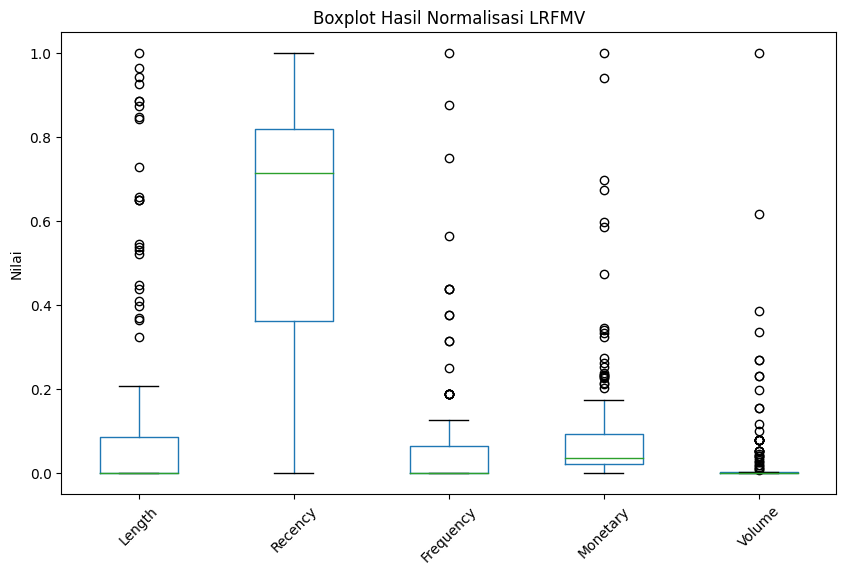

In [ ]:
import matplotlib.pyplot as plt

# Plot boxplot untuk setiap kolom dalam DataFrame hasil normalisasi
plt.figure(figsize=(10, 6))
lrfmv_scaled.boxplot()
plt.title('Boxplot Hasil Normalisasi LRFMV')
plt.ylabel('Nilai')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# **PERCOBAAN CLUSTERING**

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Misalnya, Anda memiliki data points dalam bentuk numpy array lrfmv_scaled

# Range nilai k yang ingin Anda coba
range_k = range(2, 11)  # dari 2 hingga 10

# Membuat kamus untuk menyimpan iterasi berhenti dan centroid untuk setiap nilai k
results = {}

# Loop melalui nilai k yang diinginkan
for k in range_k:
    # Inisialisasi model k-means dengan nilai k saat ini
    kme = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=42)

    # Fit model ke data
    kme.fit(lrfmv_scaled)

    # Mendapatkan jumlah iterasi yang diperlukan untuk konvergensi
    iter_stop = kme.n_iter_

    # Mendapatkan nilai centroid iterasi terakhir
    centroids = kme.cluster_centers_

     # Mendapatkan label untuk setiap titik data setelah clustering selesai
    labels = kme.labels_

    # Mengetahui jumlah data dalam setiap cluster
    cluster_counts = np.bincount(labels)

    # Menyimpan hasil ke dalam kamus
    results[k] = {'iteration_stop': iter_stop, 'centroids': centroids, 'labels': labels, 'cluster_counts': cluster_counts}

# Cetak hasil
for k, result in results.items():
    print(f"Clustering stopped at iteration {result['iteration_stop']} for k = {k}")
    print("Centroids for the last iteration:")
    print(result['centroids'])
    print("Labels for the data points:")
    print(result['labels'])
    print("Cluster counts:")
    print(result['cluster_counts'])
    print()

Clustering stopped at iteration 6 for k = 2
Centroids for the last iteration:
[[0.32573109 0.22258451 0.15384615 0.15706276 0.02916329]
 [0.02479339 0.75755088 0.02966102 0.06349408 0.03322106]]
Labels for the data points:
[1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0
 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1]
Cluster counts:
[ 52 118]

Clustering stopped at iteration 14 for k = 3
Centroids for the last iteration:
[[0.03317264 0.78658849 0.03530093 0.06780149 0.03427904]
 [0.72396694 0.2200692  0.321875   0.28798874 0.03543994]
 [0.0428965  0.27648707 0.0297619  0.0613626  0.02442002]]
Labels for the data points:
[0 0 1 0 2 0 0 0 0 2 2 0 2 1 0 2 0 0 2 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 2 0 2
 2 0 2 0 1 0 1 0 0 0 0 0 0 2 0 0 1 0 2 0 2 0 0 

<ipython-input-53-dd08a701d481>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}', cmap='viridis', alpha=0.5)


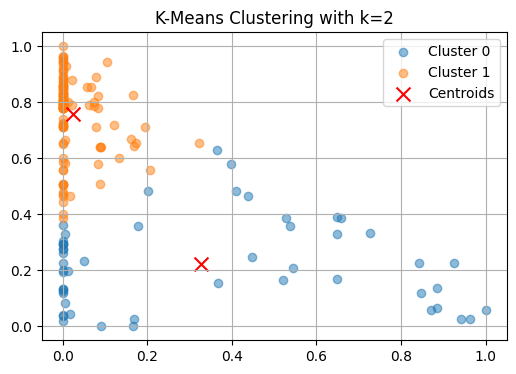

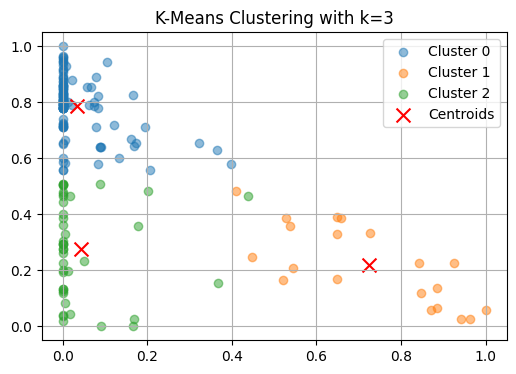

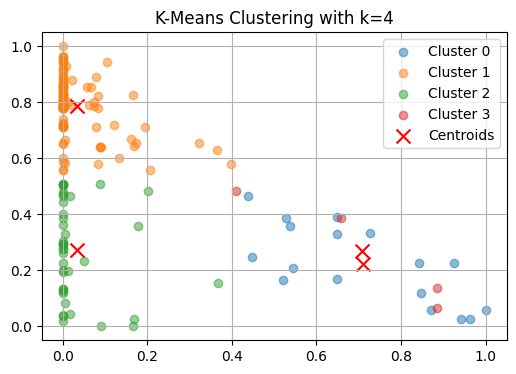

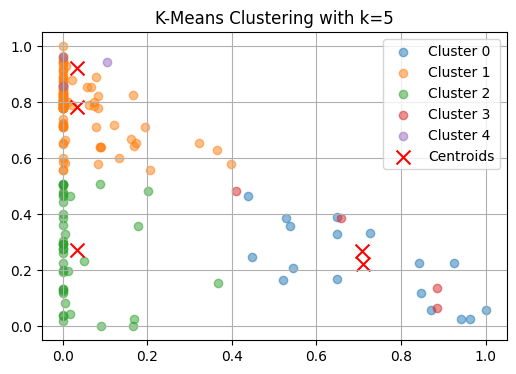

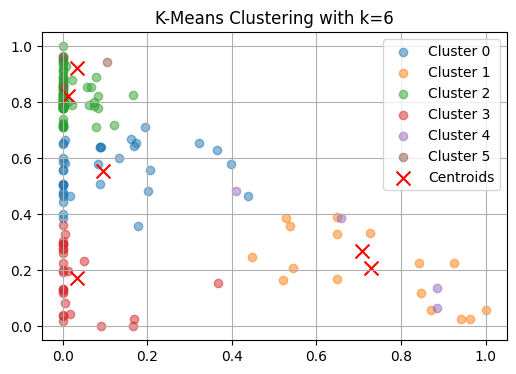

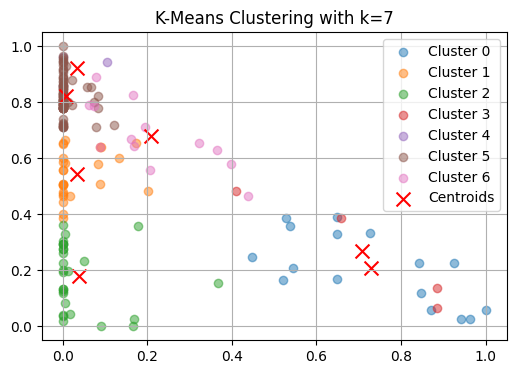

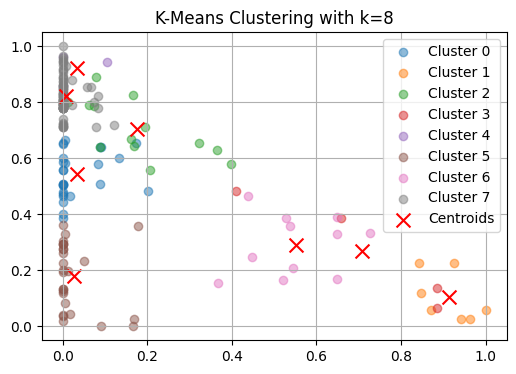

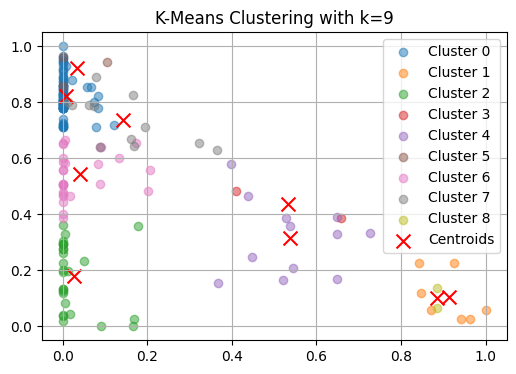

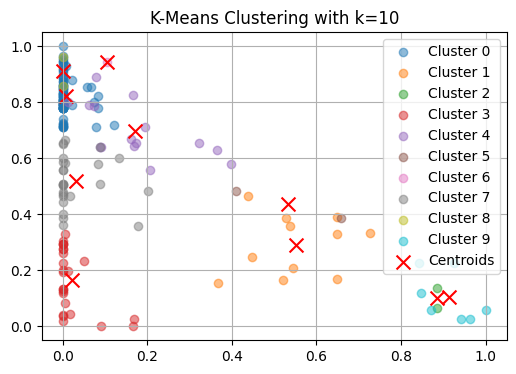

In [ ]:
import matplotlib.pyplot as plt

data_points = lrfmv_scaled.values

# Loop melalui hasil clustering
for k, result in results.items():
    # Ambil nilai centroid dan label
    centroids = result['centroids']
    labels = result['labels']

    # Plot data points
    plt.figure(figsize=(6,4))
    for i in range(k):
        cluster_points = data_points[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}', cmap='viridis', alpha=0.5)

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')

    plt.title(f'K-Means Clustering with k={k}')
    plt.legend()
    plt.grid(True)
    plt.show()


# **EVALUASI CLUSTER**

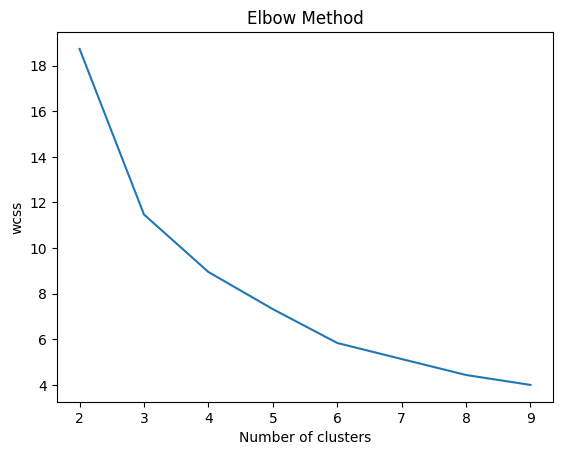

In [ ]:
#Using the elbow method to find the ideal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(2,10):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=42)
    km.fit(lrfmv_scaled)
    wcss.append(km.inertia_)
plt.plot(range(2,10),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

# P093 DIHAPUS

In [ ]:
# pip install kneed

In [ ]:
# from kneed import KneeLocator
# kl = KneeLocator(range(2,10), wcss, curve="convex", direction="decreasing")
# print("cluster terbaik adalah: ")
# kl.elbow

   Number of Clusters  Silhouette Score
0                   2          0.520692
1                   3          0.517214
2                   4          0.532525
3                   5          0.548339
4                   6          0.469588
5                   7          0.467270
6                   8          0.466302
7                   9          0.474303
8                  10          0.473171


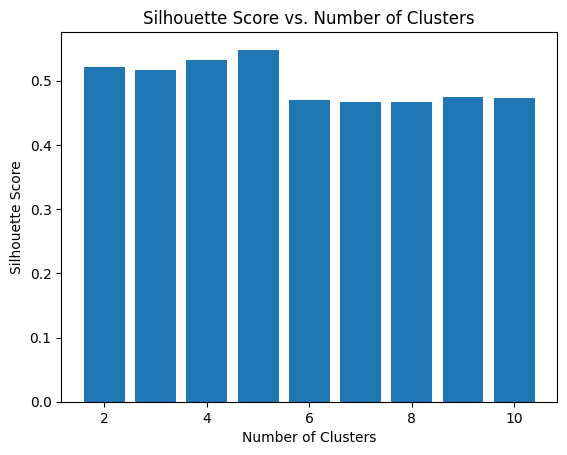

In [ ]:
cluster_range = range(2, 11)
silhouette_scores = []
fits = []

for n_clusters in cluster_range:
    # Fit the clustering model
    kmeans = KMeans(n_clusters=n_clusters, max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(lrfmv_scaled)


    # Calculate silhouette score
    silhouette_avg = silhouette_score(lrfmv_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # append the model to fits
    # fits.append(model)

# Create a DataFrame to store silhouette scores
silhouette_df = pd.DataFrame({'Number of Clusters': cluster_range, 'Silhouette Score': silhouette_scores})

# Display the silhouette scores table
print(silhouette_df)

# Create an elbow plot
plt.bar(cluster_range, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()
# P03 DIHAPUS

In [ ]:
kmeans = KMeans(n_clusters=5, max_iter=300, n_init=10, random_state=42)
kmeans.fit(lrfmv_scaled)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [ ]:
# Menghitung jarak Euclidean untuk setiap titik data ke pusat cluster terdekat
distances = kmeans.transform(lrfmv_scaled)

print(distances)

[[0.93263339 0.06299678 0.51084761 1.42146336 0.78363141]
 [0.9429852  0.07266325 0.52586928 1.43426734 0.78860838]
 [0.32583245 1.13052896 0.98642651 0.78692653 1.38649253]
 [1.00014049 0.132315   0.63694578 1.42116646 0.75066942]
 [0.75632881 0.4945911  0.08301477 1.33910848 1.00214752]
 [0.91220063 0.08200664 0.47427509 1.41472445 0.79745392]
 [0.96074052 0.09054604 0.56269988 1.42193568 0.69301263]
 [0.93263339 0.06299678 0.51084761 1.42146336 0.78363141]
 [0.9295257  0.05242338 0.50944284 1.40805381 0.77120363]
 [0.56014821 0.45977937 0.19493126 1.13219655 0.94410296]
 [0.75552088 0.65689312 0.16181971 1.33446391 1.06053135]
 [0.87847092 0.11260829 0.56281961 1.31625718 0.76353552]
 [0.7904493  0.30703448 0.21714478 1.33670544 0.88216718]
 [0.16728204 0.83265853 0.70373118 1.01499158 1.18120839]
 [1.45866694 1.08332009 1.26385887 1.63046671 0.36225187]
 [0.73460129 0.45978974 0.08935964 1.27004166 0.90653617]
 [0.96382261 0.07681521 0.56203345 1.4383474  0.77338008]
 [0.97480253 0

In [ ]:
kmeans.labels_

array([1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 4, 2, 1, 1, 2, 2, 1, 1,
       4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1,
       1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 2, 0, 1, 2, 1, 4, 1, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 3, 2, 1, 0, 2, 2, 1, 1,
       2, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0,
       1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

In [ ]:
lrfmv_scaled['cluster'] = kmeans.labels_
lrfmv_scaled

,Length,Recency,Frequency,Monetary,Volume,cluster
idPelanggan,,,,,,
P001,0.000000,0.778547,0.0000,0.020331,0.0,1
P002,0.000000,0.792388,0.0000,0.006346,0.0,1
P003,0.925620,0.224913,0.4375,0.145491,0.0,0
P004,0.000000,0.906574,0.0625,0.054177,0.0,1
P005,0.000000,0.294118,0.0000,0.000000,0.0,2
...,...,...,...,...,...,...
P167,0.000000,0.809689,0.0000,0.009989,0.0,1
P168,0.000000,0.844291,0.0000,0.051004,0.0,1
P169,0.942149,0.024221,0.0625,0.029263,0.0,0


In [ ]:
# lrfmv_filtered['cluster'] = kmeans.labels_
# lrfmv_filtered

In [ ]:
# lrfmv_filtered.to_excel('lrfmv_filtered_fix.xlsx', index=True)

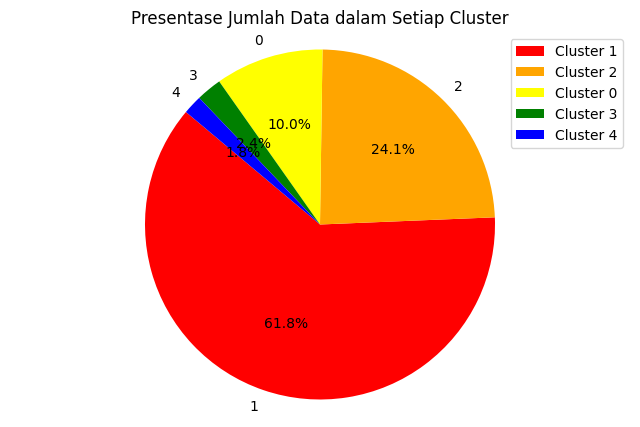

In [ ]:
import matplotlib.pyplot as plt

# Warna untuk setiap cluster
colors = ['red', 'orange', 'yellow', 'green', 'blue']

# Hitung jumlah data dalam setiap cluster
cluster_counts = lrfmv_scaled['cluster'].value_counts()

# Buat pie chart
plt.figure(figsize=(8,5))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Presentase Jumlah Data dalam Setiap Cluster')

# Tambahkan legenda
plt.legend(labels=[f'Cluster {i}' for i in cluster_counts.index], loc='best')
plt.axis('equal')  # Agar pie chart menjadi lingkaran sempurna
plt.show()


**DATA PADA CLUSTER 0**

In [ ]:
# Filter data yang memiliki label klaster sama dengan 0
cluster_0_data = lrfmv_scaled[lrfmv_scaled['cluster'] == 0]

# Tampilkan data pada cluster 0
cluster_0_data

,Length,Recency,Frequency,Monetary,Volume,cluster
idPelanggan,,,,,,
P003,0.925620,0.224913,0.4375,0.145491,0.000000,0
P014,0.727273,0.332180,0.1250,0.051709,0.000000,0
P042,0.520661,0.166090,0.2500,0.091432,0.030769,0
P044,1.000000,0.058824,0.1875,0.110223,0.000000,0
P064,0.648760,0.328720,0.0625,0.087847,0.000000,0
P086,0.537190,0.359862,0.1250,0.058761,0.051282,0
P104,0.545455,0.207612,0.1250,0.077893,0.000000,0
P112,0.648760,0.169550,0.1250,0.077505,0.000000,0
P129,0.648760,0.391003,0.3750,0.273284,0.000000,0


**DATA PADA CLUSTER 1**

In [ ]:
# Filter data yang memiliki label klaster sama dengan 1
cluster_1_data = lrfmv_scaled[lrfmv_scaled['cluster'] == 1]

# Tampilkan data pada cluster 1
cluster_1_data

,Length,Recency,Frequency,Monetary,Volume,cluster
idPelanggan,,,,,,
P001,0.0,0.778547,0.0000,0.020331,0.000000,1
P002,0.0,0.792388,0.0000,0.006346,0.000000,1
P004,0.0,0.906574,0.0625,0.054177,0.000000,1
P006,0.0,0.740484,0.0000,0.008814,0.000000,1
P007,0.0,0.830450,0.0000,0.055705,0.076923,1
...,...,...,...,...,...,...
P166,0.0,0.830450,0.0000,0.009989,0.000000,1
P167,0.0,0.809689,0.0000,0.009989,0.000000,1
P168,0.0,0.844291,0.0000,0.051004,0.000000,1


**DATA PADA CLUSTER 2**

In [ ]:
# Filter data yang memiliki label klaster sama dengan 2
cluster_2_data = lrfmv_scaled[lrfmv_scaled['cluster'] == 2]

# Tampilkan data pada cluster 2
cluster_2_data

,Length,Recency,Frequency,Monetary,Volume,cluster
idPelanggan,,,,,,
P005,0.000000,0.294118,0.0000,0.000000,0.000000,2
P010,0.177686,0.356401,0.1250,0.074262,0.000000,2
P011,0.000000,0.131488,0.0000,0.019156,0.076923,2
P013,0.000000,0.480969,0.0000,0.032201,0.000000,2
P016,0.004132,0.328720,0.0625,0.052297,0.076923,2
P019,0.000000,0.262976,0.0000,0.001175,0.000000,2
P020,0.000000,0.508651,0.0000,0.000529,0.000000,2
P024,0.016529,0.044983,0.0625,0.048771,0.000000,2
P025,0.000000,0.294118,0.0000,0.011047,0.000000,2


**DATA PADA CLUSTER 3**

In [ ]:
# Filter data yang memiliki label klaster sama dengan 3
cluster_3_data = lrfmv_scaled[lrfmv_scaled['cluster'] == 3]

# Tampilkan data pada cluster 3
cluster_3_data

,Length,Recency,Frequency,Monetary,Volume,cluster
idPelanggan,,,,,,
P054,0.409091,0.484429,0.5625,0.697665,0.098291,3
P073,0.884298,0.134948,1.0000,0.940111,0.014423,3
P102,0.884298,0.065744,0.8750,1.000000,0.000962,3
P126,0.657025,0.387543,0.7500,0.596832,0.035256,3


**DATA PADA CLUSTER 4**

In [ ]:
# Filter data yang memiliki label klaster sama dengan 4
cluster_4_data = lrfmv_scaled[lrfmv_scaled['cluster'] == 4]

# Tampilkan data pada cluster 4
cluster_4_data

,Length,Recency,Frequency,Monetary,Volume,cluster
idPelanggan,,,,,,
P015,0.000000,0.961938,0.0000,0.472574,1.000000,4
P023,0.103306,0.944637,0.1875,0.583846,0.334615,4
P108,0.000000,0.858131,0.0000,0.226981,0.615385,4


In [ ]:
# lrfmv_scaled.to_excel('lrfmv_scaled_fix.xlsx', index=True)

**RATA-RATA NILAI SEMUA VARIABEL SELURUH DATA**

In [ ]:
lrfmv_scaled.mean()

Length       0.116845
Recency      0.593914
Frequency    0.067647
Monetary     0.092115
Volume       0.031980
cluster      1.241176
dtype: float64

In [ ]:
lrfmv.mean()

Length           29.654971
Recency         172.631579
Frequency         2.385965
Monetary     941852.865497
Volume            1.415022
dtype: float64

**RATA-RATA NILAI VARIABEL PER CLUSTER**

In [ ]:
# MENGHITUNG RATA-RATA LRFMV PER CLUSTER
lrfmv_average = lrfmv_scaled.groupby(['cluster']).agg({'Length':'mean', 'Recency': 'mean', 'Frequency':'mean', 'Monetary':'mean', 'Volume':'mean'})
lrfmv_average

,Length,Recency,Frequency,Monetary,Volume
cluster,,,,,
0,0.710744,0.223082,0.194853,0.150924,0.032933
1,0.033137,0.782732,0.034524,0.057516,0.016687
2,0.033259,0.271922,0.028963,0.061870,0.025016
3,0.708678,0.268166,0.796875,0.808652,0.037233
4,0.034435,0.921569,0.062500,0.427800,0.650000


# **PERHITUNGAN NILAI CLV**

In [ ]:
# Mendefinisikan nilai bobot dari hasil perhitungan excel
bobot = { 'Length': 0.088, 'Recency': 0.044, 'Frequency': 0.145, 'Monetary': 0.485, 'Volume': 0.238}

# Kalikan setiap kolom dalam DataFrame lrfmv_average dengan nilai yang sesuai
lrfmv_clv = lrfmv_average * bobot

# Tampilkan hasil
lrfmv_clv


,Length,Recency,Frequency,Monetary,Volume
cluster,,,,,
0,0.062545,0.009816,0.028254,0.073198,0.007838
1,0.002916,0.034440,0.005006,0.027895,0.003972
2,0.002927,0.011965,0.004200,0.030007,0.005954
3,0.062364,0.011799,0.115547,0.392196,0.008861
4,0.003030,0.040549,0.009062,0.207483,0.154700


In [ ]:
# Buat kolom baru dengan nama "Total" yang berisi jumlah nilai dari setiap baris
lrfmv_clv['Total'] = lrfmv_clv.sum(axis=1)

# Buat kolom baru dengan nama "Rank" yang berisi peringkat dari total nilai, dengan peringkat yang lebih tinggi memiliki nilai yang lebih kecil
lrfmv_clv['Rank'] = lrfmv_clv['Total'].rank(ascending=False)

# Tampilkan hasil
lrfmv_clv


,Length,Recency,Frequency,Monetary,Volume,Total,Rank
cluster,,,,,,,
0,0.062545,0.009816,0.028254,0.073198,0.007838,0.181651,3.0
1,0.002916,0.034440,0.005006,0.027895,0.003972,0.074229,4.0
2,0.002927,0.011965,0.004200,0.030007,0.005954,0.055052,5.0
3,0.062364,0.011799,0.115547,0.392196,0.008861,0.590767,1.0
4,0.003030,0.040549,0.009062,0.207483,0.154700,0.414825,2.0


# **PELABELAN DATA**

In [ ]:
average_values_data = lrfmv_scaled[['Length', 'Recency','Frequency','Monetary','Volume']].mean()

# Create a new DataFrame to store the cluster information
cluster_info = pd.DataFrame()

# Iterate through each cluster
for cluster_id in lrfmv_scaled['cluster'].unique():
    # Select rows belonging to the current cluster
    cluster_data = lrfmv_scaled[lrfmv_scaled['cluster'] == cluster_id]

    # Calculate the average values for this cluster
    average_values_cluster = cluster_data[['Length', 'Recency', 'Frequency', 'Monetary', 'Volume']].mean()

    # Compare the values with the overall average and assign labels
    labels = []
    for col in ['Length', 'Recency', 'Frequency', 'Monetary', 'Volume']:
        if average_values_cluster[col] > average_values_data[col]:
            labels.append('High')
        else:
            labels.append('Low')

    # Create a row for this cluster in the cluster_info DataFrame
    cluster_info = cluster_info._append({
        'Cluster_Id': cluster_id,
        'L_Label': labels[0],
        'R_Label': labels[1],
        'F_Label': labels[2],
        'M_Label': labels[3],
        'V_Label': labels[4]
    }, ignore_index=True)


# Print the resulting DataFrame
cluster_info

,Cluster_Id,L_Label,R_Label,F_Label,M_Label,V_Label
0,1,Low,High,Low,Low,Low
1,0,High,Low,High,High,High
2,2,Low,Low,Low,Low,Low
3,4,Low,High,Low,High,High
4,3,High,Low,High,High,High


In [ ]:
cluster_sorted = cluster_info.sort_values(by='Cluster_Id', ascending=True)
cluster_sorted

,Cluster_Id,L_Label,R_Label,F_Label,M_Label,V_Label
1,0,High,Low,High,High,High
0,1,Low,High,Low,Low,Low
2,2,Low,Low,Low,Low,Low
4,3,High,Low,High,High,High
3,4,Low,High,Low,High,High


In [ ]:
cluster_Segmentation = pd.DataFrame({"Cluster_Id" :  [0,1,2,3,4],
            "Segment" : ["Pelanggan Setia", "Pelanggan Tidak aktif", "Pelanggan Baru yang Tidak Aktif", "Pelanggan Setia", "Pelanggan Potensial"]})

In [ ]:
segmentation_result = cluster_info.merge(cluster_Segmentation, on = 'Cluster_Id', how= 'inner')
segmentation_result

,Cluster_Id,L_Label,R_Label,F_Label,M_Label,V_Label,Segment
0,1,Low,High,Low,Low,Low,Pelanggan Tidak aktif
1,0,High,Low,High,High,High,Pelanggan Setia
2,2,Low,Low,Low,Low,Low,Pelanggan Baru yang Tidak Aktif
3,4,Low,High,Low,High,High,Pelanggan Potensial
4,3,High,Low,High,High,High,Pelanggan Setia


In [ ]:
# Menggabungkan DataFrame segmentation_result dan kolom 'Total' serta 'Rank' dari lrfmv_clv
final_result = pd.concat([segmentation_result, lrfmv_clv[['Total', 'Rank']]], axis=1)
final_result

,Cluster_Id,L_Label,R_Label,F_Label,M_Label,V_Label,Segment,Total,Rank
0,1,Low,High,Low,Low,Low,Pelanggan Tidak aktif,0.181651,3.0
1,0,High,Low,High,High,High,Pelanggan Setia,0.074229,4.0
2,2,Low,Low,Low,Low,Low,Pelanggan Baru yang Tidak Aktif,0.055052,5.0
3,4,Low,High,Low,High,High,Pelanggan Potensial,0.590767,1.0
4,3,High,Low,High,High,High,Pelanggan Setia,0.414825,2.0


In [ ]:
# MENGURUTKAN BERDASARKAN RANKING CLV
result_sorted = final_result.sort_values(by='Rank')
result_sorted

,Cluster_Id,L_Label,R_Label,F_Label,M_Label,V_Label,Segment,Total,Rank
3,4,Low,High,Low,High,High,Pelanggan Potensial,0.590767,1.0
4,3,High,Low,High,High,High,Pelanggan Setia,0.414825,2.0
0,1,Low,High,Low,Low,Low,Pelanggan Tidak aktif,0.181651,3.0
1,0,High,Low,High,High,High,Pelanggan Setia,0.074229,4.0
2,2,Low,Low,Low,Low,Low,Pelanggan Baru yang Tidak Aktif,0.055052,5.0
